# 데이터 
1. 데이터 병합 (72230 rows)
    - data_2019_2021.csv
        - 원본
    - data_2019_2021_revised.csv
        - 좀더 깔끔하게 정리한거 (중분류 cols 제거, 지출항목 이름 짧게 수정) 
2. 가구실태
    - data_clustering_info.csv
3. 소비지출
    - data_clustering_sobi_ver1.csv
    - data_clustering_sobi_ver2.csv
4. 비소비지출
    - data_clustering_bisobi_ver1.csv
    - data_clustering_bisobi_ver2.csv
    

In [1]:
from matplotlib import font_manager, rc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings(action='ignore')

sns.set(font_scale=1.4)
# 한글 폰트 사용을 위해서 세팅
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

pd.set_option('display.max_columns', 500)
df_2019 = pd.read_csv('./data/2019_분기자료(2019~) - 전체가구_1인이상_20220331_42440.csv', encoding='cp949')
df_2020 = pd.read_csv('./data/2020_분기자료(2019~) - 전체가구_1인이상_20220331_42440.csv', encoding='cp949')
df_2021 = pd.read_csv('./data/2021_분기자료(2019~) - 전체가구_1인이상_20220331_42440.csv', encoding='cp949')
df_2019_2021 = pd.concat([df_2019, df_2020, df_2021]).reset_index(drop=True)
# df_2019_2021.to_csv('./data/data_2019_2021.csv', index=False)

In [2]:
# 결측치 탐색

# %matplotlib inline
# fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# ax = sns.heatmap(df_2019.isnull(), cbar=False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.show()

In [3]:
# cols 분류

cols_household = df_2019_2021.loc[:, '조사연월':'배우자코드'].columns.tolist() + ['도시여부']
cols_members = df_2019_2021.loc[:, '가구주_관계코드':'거처구분코드'].columns.tolist()
cols_assets = df_2019_2021.loc[:, '자동차보유대수':'주택소유유무'].columns.tolist()
cols_quantile = df_2019_2021.loc[:, '전국전체가구_1인이상소득5분위코드':'소득구간코드'].columns.tolist()
cols_income = df_2019_2021.loc[:, '소득':'소득_비경상소득_기타비경상소득'].columns.tolist()
cols_spend = df_2019_2021.loc[:, '가계지출금액':'가계지출_비소비지출_비영리단체이전지출금액'].columns.tolist()

cols_sobi = [   '가계지출_소비지출_식료품비주류음료구입비', 
                '가계지출_소비지출_주류담배구입비', 
                '가계지출_소비지출_의류신발구입비',
                '가계지출_소비지출_주거수도광열비', 
                '가계지출_소비지출_가정용품가사서비스이용금액',
                '가계지출_소비지출_보건제품구입비',
                '가계지출_소비지출_교통비',
                '가계지출_소비지출_통신비',
                '가계지출_소비지출_오락문화비',
                '가계지출_소비지출_교육비',
                '가계지출_소비지출_음식숙박비',
                '가계지출_소비지출_기타상품서비스이용금액']

cols_bisobi = [ '가계지출_비소비지출_경상조세',
                '가계지출_비소비지출_비경상조세',
                '가계지출_비소비지출_연금기여금',
                '가계지출_비소비지출_사회보험료',
                '가계지출_비소비지출_이자비용',
                '가계지출_비소비지출_가구간이전지출금액',
                '가계지출_비소비지출_비영리단체이전지출금액']
                
cols_sobi_ = [  '식료품비주류음료구입비', 
                '주류담배구입비', 
                '의류신발구입비', 
                '주거수도광열비', 
                '가정용품가사서비스이용금액', 
                '보건제품구입비', 
                '교통비', 
                '통신비', 
                '오락문화비',
                '교육비', 
                '음식숙박비', 
                '기타상품서비스이용금액']

cols_bisobi_ = ['_경상조세',                
                '_비경상조세', 
                '_연금기여금', 
                '_사회보험료', 
                '_이자비용', 
                '_가구간이전지출금액', 
                '_비영리단체이전지출금액']


In [4]:
# 우리는 소비지출 소분류만 필요하니까 중분류 cols 제거
cols_all = df_2019_2021.loc[:,'가계지출_소비지출_식료품비주류음료구입비':'가계지출_소비지출_기타상품서비스_기타서비스금액구입비'].columns.tolist()
cols_to_remove = list(set(cols_all) - set(cols_sobi))
df_2019_2021.drop(columns=cols_to_remove, inplace=True)

# 소비지출 이름 짧게
new_names = df_2019_2021[cols_sobi].rename(columns = lambda x: x[10:])
df_2019_2021.drop(columns=cols_sobi, inplace=True)
df_2019_2021 = pd.concat([df_2019_2021, new_names], axis=1)

# 비소비지출 이름 짧게
new_names = df_2019_2021[cols_bisobi].rename(columns=lambda x: x[10:])
df_2019_2021.drop(columns=cols_bisobi, inplace=True)
df_2019_2021 = pd.concat([df_2019_2021, new_names], axis=1)

df_2019_2021

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,배우자코드,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_10차산업분류코드,가구주_7차직업분류코드,가구주_종사상지위코드,가구원2_가구주관계코드,가구원2_성별코드,가구원2_연령,가구원2_학력코드,가구원2_수학구분코드,가구원2_취업여부,가구원2_10차산업분류코드,가구원2_7차직업분류코드,가구원2_종사상지위코드,가구원3_가구주관계코드,가구원3_성별코드,가구원3_연령,가구원3_학력코드,가구원3_수학구분코드,가구원3_취업여부,가구원3_10차산업분류코드,가구원3_7차직업분류코드,가구원3_종사상지위코드,가구원4_가구주관계코드,가구원4_성별코드,가구원4_연령,가구원4_학력코드,가구원4_수학구분코드,가구원4_취업여부,가구원4_10차산업분류코드,가구원4_7차직업분류코드,가구원4_종사상지위코드,가구원5_가구주관계코드,가구원5_성별코드,가구원5_연령,가구원5_학력코드,가구원5_수학구분코드,가구원5_취업여부,가구원5_10차산업분류코드,가구원5_7차직업분류코드,가구원5_종사상지위코드,가구원6_가구주관계코드,가구원6_성별코드,가구원6_연령,가구원6_학력코드,가구원6_수학구분코드,가구원6_취업여부,가구원6_10차산업분류코드,가구원6_7차직업분류코드,가구원6_종사상지위코드,가구원7_가구주관계코드,가구원7_성별코드,가구원7_연령,가구원7_학력코드,가구원7_수학구분코드,가구원7_취업여부,가구원7_10차산업분류코드,가구원7_7차직업분류코드,가구원7_종사상지위코드,가구원8_가구주관계코드,가구원8_성별코드,가구원8_연령,가구원8_학력코드,가구원8_수학구분코드,가구원8_취업여부,가구원8_10차산업분류코드,가구원8_7차직업분류코드,가구원8_종사상지위코드,가구원9_가구주관계코드,가구원9_성별코드,가구원9_연령,가구원9_학력코드,가구원9_수학구분코드,가구원9_취업여부,가구원9_10차산업분류코드,가구원9_7차직업분류코드,가구원9_종사상지위코드,비동거취업배우자유무,비동거학업배우자유무,비동거기타배우자유무,비동거취업미혼자녀수,비동거학업미혼자녀수,비동거기타미혼자녀수,거처구분코드,자동차보유대수,입주형태코드,월세평가금액,전세보증금,월세사글세,주거용전용면적,주택소유유무,가중값,전국전체가구_1인이상소득5분위코드,전국근로자가구_1인이상소득5분위코드,전국근로자외가구_1인이상소득5분위코드,도시전체가구_1인이상소득5분위코드,도시근로자가구_1인이상소득5분위코드,도시근로자외가구_1인이상소득5분위코드,전국전체가구_1인이상소득10분위코드,전국근로자가구_1인이상소득10분위코드,전국근로자외가구_1인이상소득10분위코드,도시전체가구_1인이상소득10분위코드,도시근로자가구_1인이상소득10분위코드,도시근로자외가구_1인이상소득10분위코드,소득구간코드,소득,소득_경상소득,소득_경상소득_근로소득,소득_경상소득_근로소득_가구주근로소득,소득_경상소득_근로소득_배우자근로소득,소득_경상소득_근로소득_기타가구원근로소득,소득_경상소득_사업소득,소득_경상소득_사업소득_가구주사업소득,소득_경상소득_사업소득_배우자사업소득,소득_경상소득_사업소득_기타가구원사업소득,소득_경상소득_사업소득_주택등임대소득,소득_경상소득_재산소득,소득_경상소득_재산소득_이자소득,소득_경상소득_재산소득_배당소득,소득_경상소득_재산소득_개인연금소득,소득_경상소득_재산소득_퇴직연금소득,소득_경상소득_재산소득_기타재산소득,소득_경상소득_이전소득,소득_경상소득_이전소득_공적연금,소득_경상소득_이전소득_기초연금,소득_경상소득_이전소득_사회수혜금액,소득_경상소득_이전소득_사회적현물이전금액,소득_경상소득_이전소득_연말정산환급금,소득_경상소득_이전소득_가구간이전소득,소득_경상소득_이전소득_할인혜택금액,소득_경상소득_이전소득_기타이전소득,소득_비경상소득,소득_비경상소득_경조소득,소득_비경상소득_퇴직수당,소득_비경상소득_기타비경상소득,가계지출금액,가계지출_소비지출금액,가계지출_비소비지출금액,도시여부,식료품비주류음료구입비,주류담배구입비,의류신발구입비,주거수도광열비,가정용품가사서비스이용금액,보건제품구입비,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용금액,_경상조세,_비경상조세,_연금기여금,_사회보험료,_이자비용,_가구간이전지출금액,_비영리단체이전지출금액
0,201914,1,2,1,0,0,0,0,1,1,3,1,2,64,6,1,2,Z,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,4,400,40000,0,50.00,2,6267.7609,1,NaN,1.0,1.0,NaN,1.0,1,NaN,1.0,1.0,NaN,1.0,1,425000,425000,150000,150000,0,0,0,0,0,0,0,0,0,0,0,0,0,275000,0,0,1933,0,6400,266667,0,0,0,0,0,0,640295,462581,177713,1,164121,2283,7333,93840,1833,10700,22100,33793,4653,0,42453,79471,0,30380,0,0,0,100000,47333
1,201914,2,1,3,2,0,0,0,1,2,1,1,1,63,4,1,1,L,9,2.0,2.0,2.0,60.0,4.0,1.0,2.0,Z,Z,NaN,3.0,2.0,36.0,6.0,1.0,1.0,M,2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,1,6,180,35000,150,50.00,2,13080.1845,2,2.0,NaN,2.0,2.0,NaN,4,3.0,NaN,4.0,3.0,NaN,3,2682647,2682647,1846917,1846917,0,0,550000,0,0,550000,0,0,0,0,0,0,0,285730,285730,0,0,0,0,0,0,0,0,0,0,0,1809623,1561639,247983,1,292516,1600,16933,310837,15587,172140,119533,89281,35364,34400,193500,279948,17607,0,0,114210,0,100833,15333
2,201914,3,2,1,0,0,0,0,1,1,3,1,1,58,6,1,2,Z,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,1,0,6,469,37000,450,50.00,2,7294.1330,1,NaN,1.0,1.0,NaN,1.0,1,NaN,1.0,1.0,NaN,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2068950,2065617,3333,1,258963,3720,202000,521147,74050,82967,38033,48073,593100,0,219300,24264,0,0

# 이상치 제거 

In [ ]:
np.log1p(pd.DataFrame(group[col]))
로그만 씌워서 클러스터링 해보기 

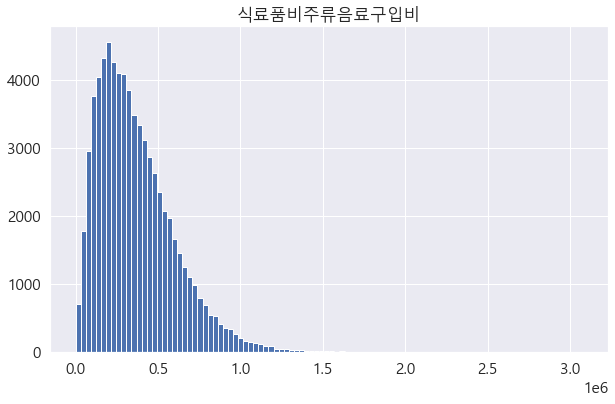

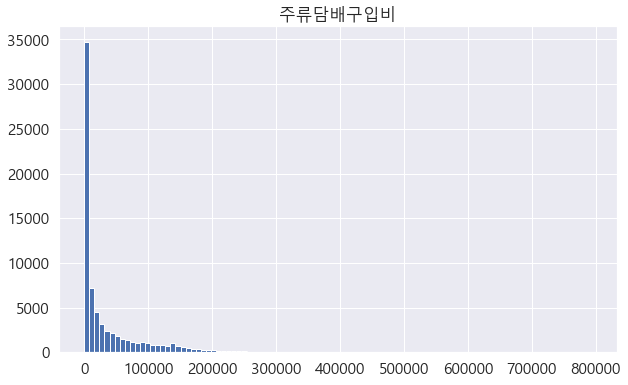

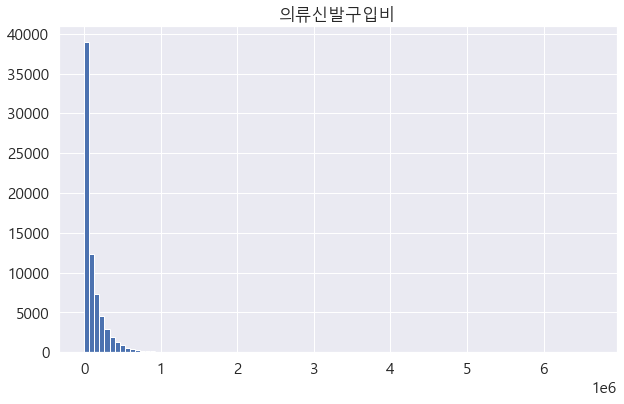

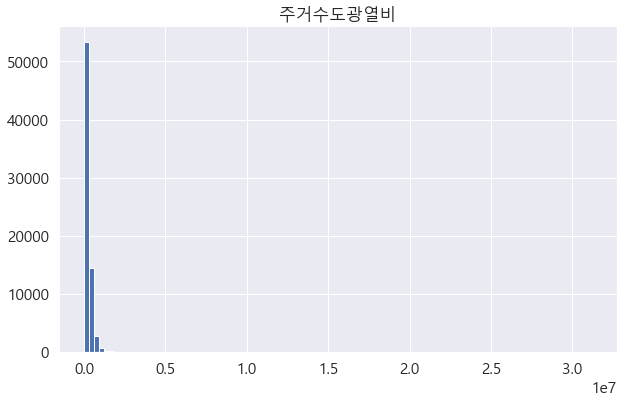

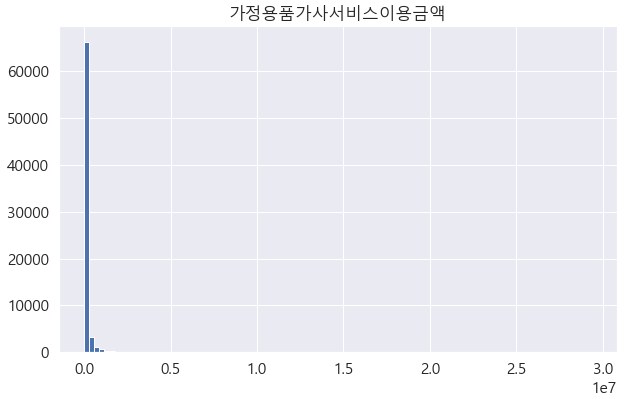

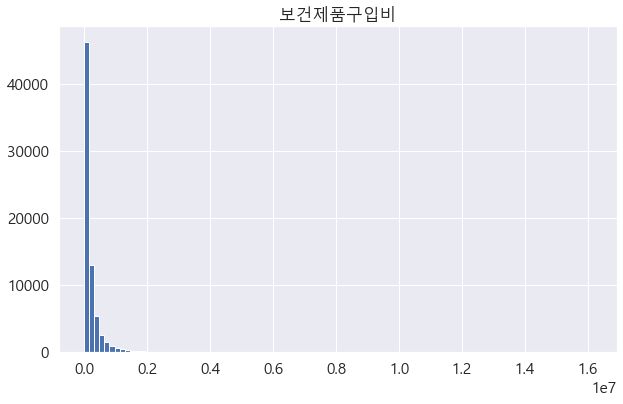

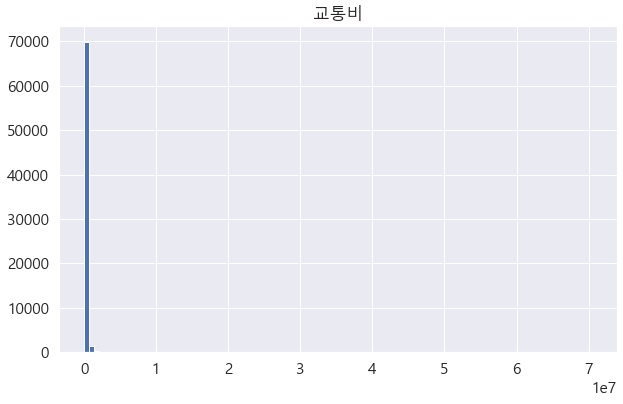

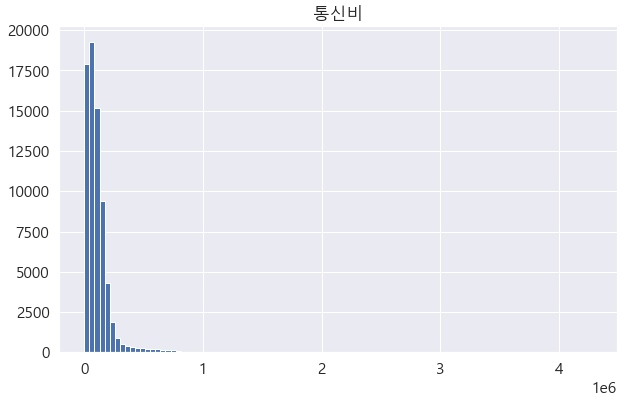

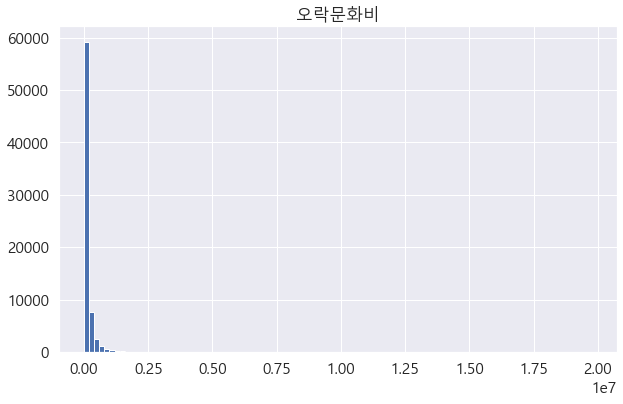

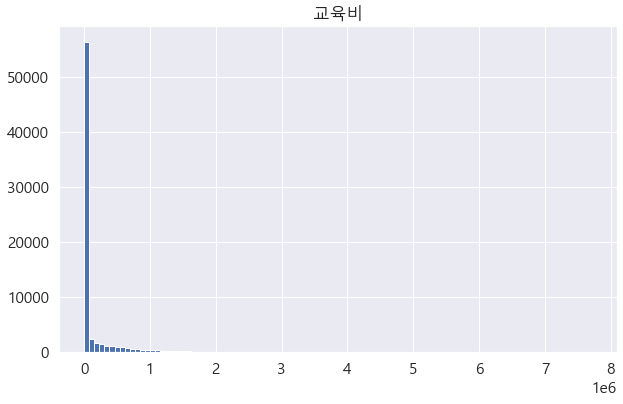

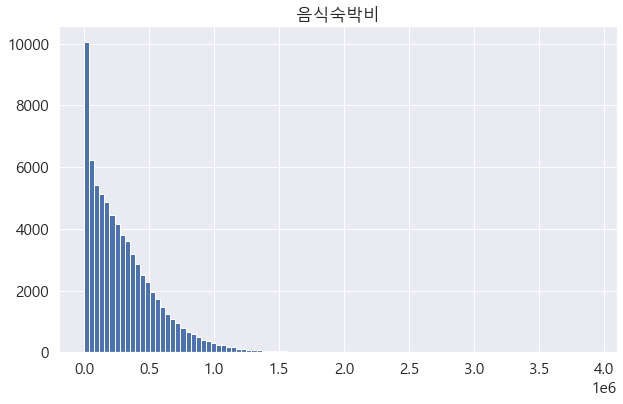

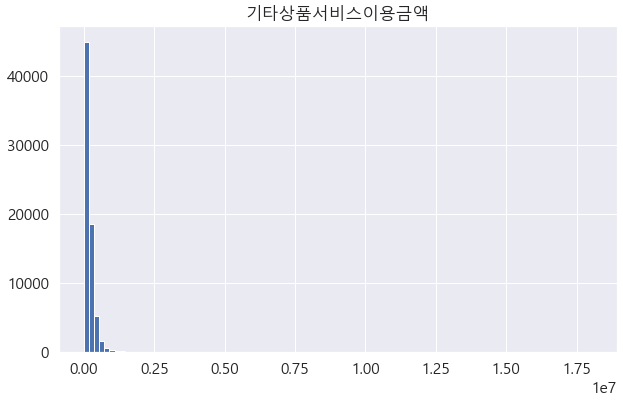

In [146]:
# 업종별 분포 skewness 확인

df = df_2019_2021.copy()[cols_sobi_]

from scipy.stats import skew, kurtosis
skewness_list = []
kurtosis_list = []

for col in df.columns:  # 식료품, 주류, 의류, ...

  skewness_list.append(skew(df[col]))
  kurtosis_list.append(kurtosis(df[col]))

  df[col].hist(bins=100)
  plt.title(col)
  plt.show()


In [140]:
df_skewness = pd.DataFrame(skewness_list, columns=['skewness']).T
df_skewness.columns = df.columns
df_skewness = round(df_skewness, 1)

df_kurtosis = pd.DataFrame(kurtosis_list, columns=['kurtosis']).T
df_kurtosis.columns = df.columns
df_kurtosis = round(df_kurtosis, 1)

pd.concat([df_skewness, df_kurtosis])


,식료품비주류음료구입비,주류담배구입비,의류신발구입비,주거수도광열비,가정용품가사서비스이용금액,보건제품구입비,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용금액
skewness,1.3,2.5,5.7,25.6,18.6,8.7,19.2,5.8,16.1,4.7,1.7,17.8
kurtosis,3.5,9.0,86.4,1187.1,819.8,157.2,525.0,59.1,669.5,33.9,5.6,558.9


In [148]:
df = df_2019_2021.copy()[cols_household + cols_quantile + cols_sobi_]
df

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,배우자코드,도시여부,전국전체가구_1인이상소득5분위코드,전국근로자가구_1인이상소득5분위코드,전국근로자외가구_1인이상소득5분위코드,도시전체가구_1인이상소득5분위코드,도시근로자가구_1인이상소득5분위코드,도시근로자외가구_1인이상소득5분위코드,전국전체가구_1인이상소득10분위코드,전국근로자가구_1인이상소득10분위코드,전국근로자외가구_1인이상소득10분위코드,도시전체가구_1인이상소득10분위코드,도시근로자가구_1인이상소득10분위코드,도시근로자외가구_1인이상소득10분위코드,소득구간코드,식료품비주류음료구입비,주류담배구입비,의류신발구입비,주거수도광열비,가정용품가사서비스이용금액,보건제품구입비,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용금액
0,201914,1,2,1,0,0,0,0,1,1,3,1,1,NaN,1.0,1.0,NaN,1.0,1,NaN,1.0,1.0,NaN,1.0,1,164121,2283,7333,93840,1833,10700,22100,33793,4653,0,42453,79471
1,201914,2,1,3,2,0,0,0,1,2,1,1,2,2.0,NaN,2.0,2.0,NaN,4,3.0,NaN,4.0,3.0,NaN,3,292516,1600,16933,310837,15587,172140,119533,89281,35364,34400,193500,279948
2,201914,3,2,1,0,0,0,0,1,1,3,1,1,NaN,1.0,1.0,NaN,1.0,1,NaN,1.0,1.0,NaN,1.0,1,258963,3720,202000,521147,74050,82967,38033,48073,593100,0,219300,24264
3,201914,4,1,3,1,0,0,0,1,2,1,1,3,2.0,NaN,3.0,2.0,NaN,6,4.0,NaN,6.0,4.0,NaN,4,179228,5833,50333,165620,1907,23413,163310,142390,54820,23333,384367,131791
4,201914,5,1,2,1,0,0,0,1,2,3,1,2,1.0,NaN,2.0,1.0,NaN,3,2.0,NaN,3.0,2.0,NaN,3,382423,72167,783093,402513,6376363,360420,50723,86457,1043283,0,295043,1653948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72225,202144,6547,1,3,2,0,0,1,0,2,1,0,4,3.0,NaN,NaN,NaN,NaN,7,6.0,NaN,NaN,NaN,NaN,6,579660,114200,49800,110600,59180,156000,398820,140766,94440,303000,972100,293039
72226,202144,6548,1,3,2,0,0,1,0,2,1,0,3,2.0,NaN,NaN,NaN,NaN,5,4.0,NaN,NaN,NaN,NaN,4,335240,20110,154000,151310,52000,22900,46180,88749,200457,135000,716400,379432
72227,202144,6549,1,2,1,0,0,0,1,1,1,0,4,4.0,NaN,NaN,NaN,NaN,7,7.0,NaN,NaN,NaN,NaN,6,330625,40275,319145,88010,142235,55250,671339,932867,445371,0,630300,211141
72228,202144,6550,2,2,2,1,0,1,0,1,1,0,4,NaN,4.0,NaN,NaN,NaN,7,NaN,8.0,NaN,NaN,NaN,6,609195,68900,87025,297830,256080,200990,569065,123446,87641,0,477600,477488


In [149]:
def detect_outliers(df, features):  # detect_outliers(df, n, features)

  outlier_indices = []
  for col in features:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    outlier_step = 1.5 * IQR

    outlier_list_col = df[(df[col] < Q1 - outlier_step)
                          | (df[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  
  # list(k for k, v in outlier_indices.items() if v > n)
  multiple_outliers = list(k for k, v in outlier_indices.items())

  return multiple_outliers

#Outliers_to_drop = detect_outliers(df, 2, ["이용금액"])


### 제거~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [104]:
count_list = []
outliers_list = []

for col in cols_sobi_:
    
    # 업종 하나만 남기고 다 지우기
    cols_to_remove = [x for x in cols_sobi_ if x != col]
    df_temp = df.drop(columns=cols_to_remove) 

    # 가구 그룹화
    grouped = df_temp.groupby(
        by=['조사연월', '가구구분코드', '도시여부', '전국전체가구_1인이상소득5분위코드'])  # ['조사연월', '가구구분코드', '도시여부', '전국전체가구_1인이상소득5분위코드']
    
    # 그룹별 이상치 제거
    count = 0
    all_data = []
    for name, group in grouped:

        input = np.log1p(pd.DataFrame(group[col])) # 로그 변환한 이용금액 col
        Outliers_to_drop = detect_outliers(input, [col]) # outlier 의 index
        outliers_list.extend(Outliers_to_drop)

        count += len(Outliers_to_drop)

    count_list.append(count)


In [105]:
count_list # 업종별로, 각 그룹에서 발생한 이상치 수를 모두 더한 것 (즉, 업종별 이상치 수)

[1824, 5876, 6582, 2852, 4041, 4422, 4259, 5708, 1351, 4137, 3238, 3232]

In [106]:
len(set(outliers_list))  # 위 이상치를 모두 합치고 중복을 제외하면 32154명


32154

In [110]:
count_list = []
outliers_list = []

for col in cols_sobi_:

    # 업종 하나만 남기고 다 지우기
    cols_to_remove = [x for x in cols_sobi_ if x != col]
    df_temp = df.drop(columns=cols_to_remove)

    # 가구 그룹화
    grouped = df_temp.groupby(
        by=['도시여부', '전국전체가구_1인이상소득5분위코드'])  # ['조사연월', '가구구분코드', '도시여부', '전국전체가구_1인이상소득5분위코드']

    # 그룹별 이상치 제거
    count = 0
    all_data = []
    for name, group in grouped:

        input = np.log1p(pd.DataFrame(group[col]))  # 로그 변환한 이용금액 col
        Outliers_to_drop = detect_outliers(input, [col])  # outlier 의 index
        outliers_list.extend(Outliers_to_drop)

        count += len(Outliers_to_drop)

    count_list.append(count)


In [111]:
count_list  # 업종별로, 각 그룹에서 발생한 이상치 수를 모두 더한 것 (즉, 업종별 이상치 수)


[1757, 8456, 6133, 2384, 3965, 4339, 4257, 5709, 1454, 3433, 3250, 3181]

In [112]:
len(set(outliers_list))  # 위 이상치를 모두 합치고 중복을 제외하면 32510명


32510

In [150]:
count_list = []
outliers_list = []

for col in ['주거수도광열비', '가정용품가사서비스이용금액', '교통비']:

    # 업종 하나만 남기고 다 지우기
    cols_to_remove = [x for x in cols_sobi_ if x != col]
    df_temp = df.drop(columns=cols_to_remove)

    # 가구 그룹화
    grouped = df_temp.groupby(
        by=['조사연월', '가구구분코드', '도시여부', '전국전체가구_1인이상소득5분위코드'])  # ['조사연월', '가구구분코드', '도시여부', '전국전체가구_1인이상소득5분위코드']

    # 그룹별 이상치 제거
    count = 0
    all_data = []
    for name, group in grouped:

        input = np.log1p(pd.DataFrame(group[col]))  # 로그 변환한 이용금액 col
        Outliers_to_drop = detect_outliers(input, [col])  # outlier 의 index
        outliers_list.extend(Outliers_to_drop)

        count += len(Outliers_to_drop)

    count_list.append(count)


In [151]:
count_list


[2852, 4041, 4259]

In [152]:
len(set(outliers_list))  # 위 이상치를 모두 합치고 중복을 제외하면 10207명


10207

# 데이터 저장 

## 병합하고 정리 

In [17]:
df_2019_2021.to_csv('./data/data_2019_2021_revised.csv', index=False)

## 가구실태

In [18]:
df = df_2019_2021.copy()

df_house = df[ cols_household +  ['소득']]

df_house.to_csv('./data/data_clustering_info.csv', index=False)
df_house

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,배우자코드,도시여부,소득
0,201914,1,2,1,0,0,0,0,1,1,3,1,425000
1,201914,2,1,3,2,0,0,0,1,2,1,1,2682647
2,201914,3,2,1,0,0,0,0,1,1,3,1,0
3,201914,4,1,3,1,0,0,0,1,2,1,1,3702933
4,201914,5,1,2,1,0,0,0,1,2,3,1,2050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72225,202144,6547,1,3,2,0,0,1,0,2,1,0,5021610
72226,202144,6548,1,3,2,0,0,1,0,2,1,0,3717930
72227,202144,6549,1,2,1,0,0,0,1,1,1,0,5388172
72228,202144,6550,2,2,2,1,0,1,0,1,1,0,5434060


## 소비지출, 비소비지출 


### ver1

In [164]:
df = df_2019_2021.copy()

df_spend = df[cols_sobi_]
df_spend['sum'] = df_spend.sum(axis=1)
df_spend = df_spend.div(df_spend['sum'], axis=0)
df_spend = df_spend.drop(columns=['sum'])

df_spend.to_csv('./data/data_clustering_sobi_ver1.csv', index=False)

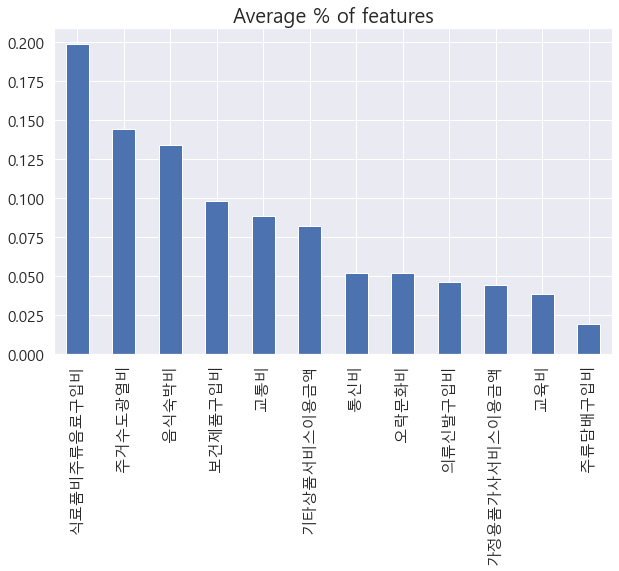

In [165]:
means = df_spend.mean().sort_values(ascending=False)

plt.rcParams["figure.figsize"] = (10, 6)
means.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average % of features', size=20)
plt.grid(True, axis='y')


In [166]:
df = df_2019_2021.copy()

df_spend = df[cols_bisobi_]
df_spend['sum'] = df_spend.sum(axis=1)
df_spend = df_spend.div(df_spend['sum'], axis=0)
df_spend = df_spend.drop(columns=['sum'])

df_spend.to_csv('./data/data_clustering_bisobi_ver1.csv', index=False)

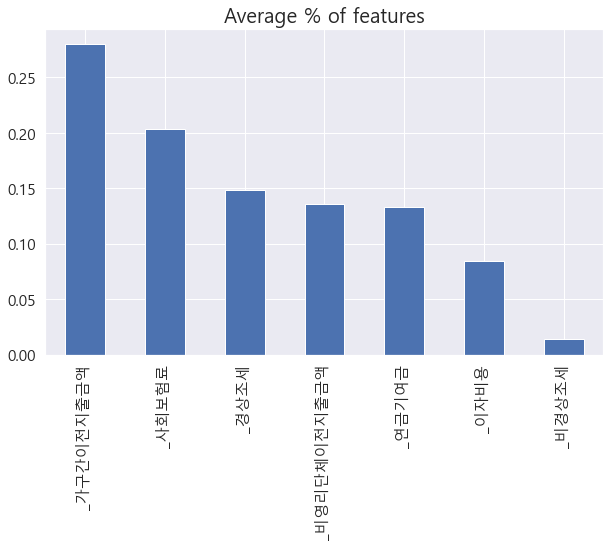

In [167]:
means = df_spend.mean().sort_values(ascending=False)

plt.rcParams["figure.figsize"] = (10, 6)
means.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average % of features', size=20)
plt.grid(True, axis='y')

### ver2 

In [85]:
df = df_2019_2021.copy()

df_spend = df[cols_sobi_]
df_spend = np.log1p(df_spend)  # ver 2
df_spend['sum'] = df_spend.sum(axis=1)
df_spend = df_spend.div(df_spend['sum'], axis=0)
df_spend = df_spend.drop(columns=['sum'])

df_spend.to_csv('./data/data_clustering_sobi_ver2.csv', index=False)

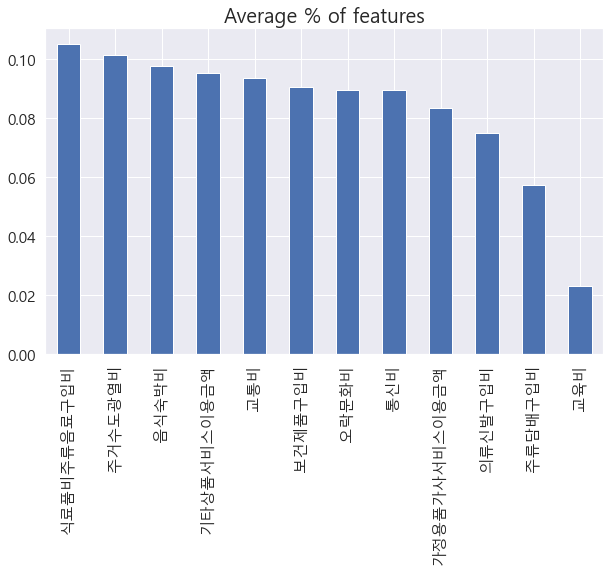

In [86]:
means = df_spend.mean().sort_values(ascending=False)

plt.rcParams["figure.figsize"] = (10, 6)
means.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average % of features', size=20)
plt.grid(True, axis='y')


In [87]:
df = df_2019_2021.copy()

df_spend = df[cols_bisobi_]
df_spend = np.log1p(df_spend)  # ver 2
df_spend['sum'] = df_spend.sum(axis=1)
df_spend = df_spend.div(df_spend['sum'], axis=0)
df_spend = df_spend.drop(columns=['sum'])

df_spend.to_csv('./data/data_clustering_bisobi_ver2.csv', index=False)

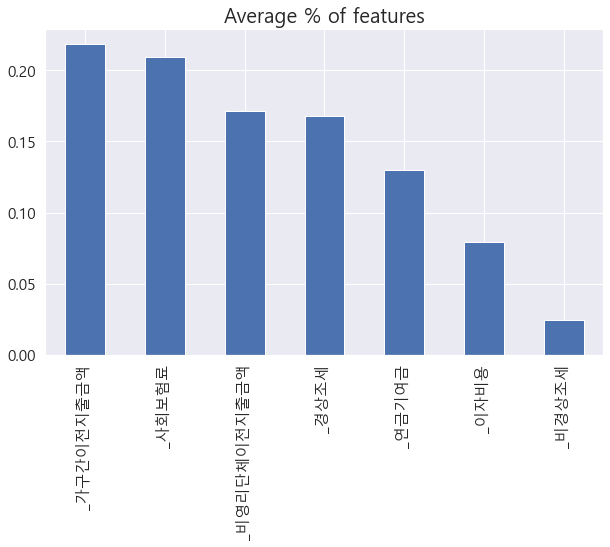

In [88]:
means = df_spend.mean().sort_values(ascending=False)

plt.rcParams["figure.figsize"] = (10, 6)
means.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average % of features', size=20)
plt.grid(True, axis='y')


## 소비지출, 비소비지출 (new)
- 소비총액으로 나누지 말고 월소득으로 나눈다 

### ver1 

In [11]:
df = df_2019_2021.copy()

# df['소득'] = df['소득'] + 1
df = df[df['소득'] != 0 ] # 72230 -> 71700 가구

df_spend = df[cols_sobi_]
df_spend = df_spend.div(df['소득'], axis=0)

df_spend.to_csv('./data/newdata_clustering_sobi_ver1.csv', index=False)

In [90]:
df = df_2019_2021.copy()

# df['소득'] = df['소득'] + 1
df = df[df['소득'] != 0 ]

df_spend = df[cols_bisobi_]
df_spend = df_spend.div(df['소득'], axis=0)

df_spend.to_csv('./data/newdata_clustering_bisobi_ver1.csv', index=False)

### ver2 

In [91]:
df = df_2019_2021.copy()

# df['소득'] = df['소득'] + 1
df = df[df['소득'] != 0]
df['소득'] = np.log1p(df['소득'])  # ver 2

df_spend = df[cols_sobi_]
df_spend = np.log1p(df_spend)  # ver 2
df_spend = df_spend.div(df['소득'], axis=0)

df_spend.to_csv('./data/newdata_clustering_sobi_ver2.csv', index=False)

In [92]:
df = df_2019_2021.copy()

# df['소득'] = df['소득'] + 1
df = df[df['소득'] != 0]
df['소득'] = np.log1p(df['소득'])  # ver 2

df_spend = df[cols_bisobi_]
df_spend = np.log1p(df_spend)  # ver 2
df_spend = df_spend.div(df['소득'], axis=0)

df_spend.to_csv('./data/newdata_clustering_bisobi_ver2.csv', index=False)

## 그냥 로그 + robust scaler 

In [80]:
from sklearn.preprocessing import RobustScaler
df = df_2019_2021.copy()

df_spend = df[cols_sobi_]
df_spend = np.log1p(df_spend)

# robust scaler
df_spend = df_spend.T
transformer = RobustScaler().fit(df_spend)
final = transformer.transform(df_spend)
final = pd.DataFrame(final.T, columns=cols_sobi_)
final.to_csv('./data/그냥로그_scaled.csv', index=False)